# TechAcademy: Honey and Bees Python Solution

 # Exlporatory Data Analysis (EDA)

## Import Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import plotly.express as px
import seaborn as sns
import folium

## Plot Styles

In [2]:
plt.style.use('./styles/ta.mplstyle')  # TA-Style
myFmt = mdates.DateFormatter('%Y-%m')

## Load the data

In [3]:
# Bees
bees = pd.read_csv('https://drive.google.com/uc?export=download&id=1jFm0lA-n_kiiiXcBJBmIYzPHL7Go_ijg', index_col=0)
# Honey
honey = pd.read_csv('https://drive.google.com/uc?export=download&id=1bQtWQluwwGUIgZuDOsJOE-4Om7x4HOxP', index_col=0)
# Weather
weather = pd.read_csv('https://drive.google.com/uc?export=download&id=130q2nv8-4S769iEEAsunGmiF16tahNmT', index_col=0)

## Rename the weather index nicely

In [4]:
# enjoy this link to rename the weather index https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
weather.rename(index=abbrev_to_us_state, inplace=True)

## Get a feeling for the data

In [5]:
print(bees.head())
print(honey.head())
print(weather.head())
print(bees["Starting Colonies"].describe())

print(bees.dtypes)
print(honey.dtypes)
print(weather.dtypes)

            Date  Starting Colonies  Maximum Colonies  Lost Colonies  \
State                                                                  
Alabama  2015-Q3             8500.0            9000.0         1400.0   
Alabama  2015-Q4             8000.0            8000.0          610.0   
Alabama  2016-Q1             7500.0            7500.0         1700.0   
Alabama  2015-Q2             7500.0            7500.0          860.0   
Alabama  2015-Q1             7000.0            7000.0         1800.0   

         Added Colonies  Renovated Colonies  Percent Renovated  \
State                                                            
Alabama           160.0               260.0                3.0   
Alabama            80.0                60.0                1.0   
Alabama          2100.0                90.0                1.0   
Alabama          1900.0               680.0                9.0   
Alabama          2800.0               250.0                4.0   

         Varroa Mites (Percent) 

## Task 0: Some overall Statements

In [6]:
# Exclude index values regarding the U.S. as a whole
# State and year with most producing colonies ever
tmp = honey.copy()
tmp = tmp.drop(['United States'])
tmp1 = tmp.loc[tmp["Honey producing colonies (thousand)"] == tmp["Honey producing colonies (thousand)"].max()]
print(tmp1[["Honey producing colonies (thousand)", "Year"]])

              Honey producing colonies (thousand)  Year
State                                                  
North Dakota                                  530  2018


In [7]:
# State with lowest honey price every
tmp2 = tmp.loc[tmp["Average price per pound (dollars)"] == tmp["Average price per pound (dollars)"].min()]
print(tmp2[["Average price per pound (dollars)", "Year"]])

        Average price per pound (dollars)  Year
State                                          
Hawaii                               1.28  2019


In [8]:
# Total United States Honey production
# Year is a float
tmp3 = honey.loc[(honey["Production (1,000 pounds)"] == honey["Production (1,000 pounds)"].max()) & (honey.Year == 2016)]
print(tmp3[["Production (1,000 pounds)"]])

               Production (1,000 pounds)
State                                   
United States                     161882


In [9]:
# Total United States Honey producing colonies
tmp4 = tmp.loc[tmp.Year == 2016]
print(tmp4[["Honey producing colonies (thousand)"]].sum())

Honey producing colonies (thousand)    2775
dtype: int64


## Task 1: Convert from pounds to kg and prices to $/kg

In [10]:
honey["honey_producing_colonies"] = honey["Honey producing colonies (thousand)"] # * 1000
honey["yield_colony_kg"] = honey["Yield per colony (pounds)"] * 0.453592
honey["production_kg"] = honey["Production (1,000 pounds)"] * 0.453592  # * 1000
honey["stock_price_kg"] = honey["Stocks December 15  (1,000 pounds) "] /1000 * 0.453592 * 100
honey["avg_price_kg"] = honey["Average price per pound (dollars)"] * 0.453592
honey["prod_value"] = honey["Value of production (1,000 dollars)"]  # * 1000

honey.drop(
    ["Honey producing colonies (thousand)", "Yield per colony (pounds)", "Production (1,000 pounds)",
     "Stocks December 15  (1,000 pounds) ", "Average price per pound (dollars)", "Value of production (1,000 dollars)"],
    axis=1,
    inplace=True,
)

## Task 2: write loop to round up to the decimal place you prefer (does not make sense for Python really)

In [11]:
honey = honey.round(2)

## Task 3: Years in date format

In [12]:
honey.Year = pd.to_datetime(honey.Year, format="%Y")  # assumes start of year 01.01 by convention
bees.Date = pd.to_datetime(bees.Date)
weather.datetime = pd.to_datetime(weather.datetime)

## Task 4: numbers into numeric format, numeric should be a loop

In [13]:
cols = bees.columns.drop(['Date', 'Latitude', 'Longitude', 'State_code'])
bees[cols] = bees[cols].apply(pd.to_numeric, errors='coerce')

# as a tideous loop
# for col in cols:
#    bees[col] = pd.to_numeric(bees[col], errors='coerce')


In [14]:
bees.dtypes

Date                                   datetime64[ns]
Starting Colonies                             float64
Maximum Colonies                              float64
Lost Colonies                                 float64
Added Colonies                                float64
Renovated Colonies                            float64
Percent Renovated                             float64
Varroa Mites (Percent)                        float64
Other pests and parasites (Percent)           float64
Diseases (percent)                            float64
Pesticides (percent)                          float64
Other (percent)                               float64
Unknown (percent)                             float64
State_code                                     object
Latitude                                      float64
Longitude                                     float64
dtype: object

## Task 5: Calculate the percentage of lost colonies & round, why id you decide to round the way you have to?

In [15]:
bees

Date  Starting Colonies  Maximum Colonies  Lost Colonies  \
State                                                                    
Alabama 2015-07-01             8500.0            9000.0         1400.0   
Alabama 2015-10-01             8000.0            8000.0          610.0   
Alabama 2016-01-01             7500.0            7500.0         1700.0   
Alabama 2015-04-01             7500.0            7500.0          860.0   
Alabama 2015-01-01             7000.0            7000.0         1800.0   
...            ...                ...               ...            ...   
Wyoming 2020-01-01             4000.0           17000.0          140.0   
Wyoming 2020-04-01            17500.0           30000.0         2000.0   
Wyoming 2020-07-01            33000.0           34000.0         3600.0   
Wyoming 2020-10-01            23000.0           25000.0         1600.0   
Wyoming 2021-01-01            13000.0           14500.0         1700.0   

         Added Colonies  Renovated Colonies  Percent Renovated  \
State                                                            
Alabama           160.0               260.0                3.0   
Alabama            80.0                60.0                1.0   
Alabama          2100.0                90.0                1.0   
Alabama          1900.0               680.0                9.0   
Alabama          2800.0               250.0                4.0   
...                 ...                 ...                ...   
Wyoming           450.0                60.0                NaN   
Wyoming          4400.0              2100.0                7.0   
Wyoming           640.0              7500.0               22.0   
Wyoming           160.0               380.0                2.0   
Wyoming           500.0              1200.0                8.0   

         Varroa Mites (Percent)  Other pests and parasites (Percent)  \
State                                                                  
Alabama                    63.1                                 70.6   
Alabama                     3.1                                  6.4   
Alabama                    24.2                                 22.0   
Alabama                    16.7                                 42.5   
Alabama                    10.0                                  5.4   
...                         ...                                  ...   
Wyoming                     NaN                                  NaN   
Wyoming                    28.8                                  NaN   
Wyoming                    13.4                                  NaN   
Wyoming                    19.2                                  0.0   
Wyoming                     NaN                                  NaN   

         Diseases (percent)  Pesticides (percent)  Other (percent)  \
State                                                                
Alabama                 NaN                   2.6              2.2   
Alabama                 0.2                   0.2              2.8   
Alabama                 4.3                   8.1              2.4   
Alabama                 NaN                   2.3              3.2   
Alabama                 NaN                   2.2              9.1   
...                     ...                   ...              ...   
Wyoming                 0.1                   0.0              0.8   
Wyoming                 0.1                   1.1              3.5   
Wyoming                 0.7                   5.9              1.8   
Wyoming                 NaN                   2.4              2.2   
Wyoming                 NaN                   0.0              3.3   

         Unknown (percent) State_code   Latitude   Longitude  
State                                                         
Alabama               17.7         AL  32.601011  -86.680736  
Alabama                1.9         AL  32.601011  -86.680736  
Alabama               11.3         AL  32.601011  -86.680736  
Alabama                4.1   

In [16]:
bees["lost_colonies_percent"] = bees["Lost Colonies"] / bees["Maximum Colonies"] * 100
bees.lost_colonies_percent

State
Alabama    15.555556
Alabama     7.625000
Alabama    22.666667
Alabama    11.466667
Alabama    25.714286
             ...    
Wyoming     0.823529
Wyoming     6.666667
Wyoming    10.588235
Wyoming     6.400000
Wyoming    11.724138
Name: lost_colonies_percent, Length: 1125, dtype: float64

## Task 6: Bees Missing Values

In [17]:
# Let's check out all missing values
null_data = bees[bees.isnull().any(axis=1)]
print(null_data)
# 2019-04-01 seems to have cross-state issues on bee data

# Deciding to do a simple combination of ffill and bfill
no_null_data = null_data.ffill().bfill()
print(no_null_data)

              Date  Starting Colonies  Maximum Colonies  Lost Colonies  \
State                                                                    
Alabama 2015-07-01             8500.0            9000.0         1400.0   
Alabama 2015-04-01             7500.0            7500.0          860.0   
Alabama 2015-01-01             7000.0            7000.0         1800.0   
Alabama 2016-10-01             7000.0            7000.0          610.0   
Alabama 2016-07-01             8000.0            8000.0         1200.0   
...            ...                ...               ...            ...   
Wyoming 2020-01-01             4000.0           17000.0          140.0   
Wyoming 2020-04-01            17500.0           30000.0         2000.0   
Wyoming 2020-07-01            33000.0           34000.0         3600.0   
Wyoming 2020-10-01            23000.0           25000.0         1600.0   
Wyoming 2021-01-01            13000.0           14500.0         1700.0   

         Added Colonies  Renovated Co

In [18]:
# actually apply that
bees = bees.ffill().bfill()

## Task 7: Group means over quarters for each year

In [19]:
# Sorry for the chain commands :P
bees_grped = bees.groupby([bees.index, bees.Date.dt.year]).mean().reset_index(level=1).sort_values(["State","Date"])
# group_by with reset_index does not preserve dtypes
bees_grped.Date = pd.to_datetime(bees_grped.Date, format="%Y")

## Task 8: Prepare for merging bees with honey

In [20]:
bees_grped.rename(
    columns={
    "Starting Colonies": "starting_cols",
    "Maximum Colonies": "max_cols",
    "Lost Colonies": "lost_cols",
    "Added Colonies": "added_cols",
    "Diseases (percent)": "diseases_perc",
    "Other pests and parasites (Percent)": "other_pest_parasites_perc",
    "Other (percent)": "other_perc",
    "Unknown (percent)": "unknown_perc",
    "Percent Renovated": "perc_renovated",
    "Renovated Colonies": "renovated_cols",
    "Pesticides (percent)": "pesticides_perc",
    "Varroa Mites (Percent)": "varroa_mites_perc",
},
    inplace=True,
)
bees_grped

Date  starting_cols  max_cols  lost_cols  added_cols  \
State                                                                
Alabama 2015-01-01         7750.0    7875.0     1167.5      1235.0   
Alabama 2016-01-01         7625.0    7625.0     1110.0       947.5   
Alabama 2017-01-01         7000.0    7625.0      982.5       752.5   
Alabama 2018-01-01         7375.0    7750.0     1000.0      1177.5   
Alabama 2019-01-01         6375.0    6750.0      737.5       725.0   
...            ...            ...       ...        ...         ...   
Wyoming 2017-01-01        21125.0   28000.0     3475.0      3225.0   
Wyoming 2018-01-01        19250.0   25750.0     2280.0      1897.5   
Wyoming 2019-01-01        16000.0   18500.0     1700.0       650.0   
Wyoming 2020-01-01        19375.0   26500.0     1835.0      1412.5   
Wyoming 2021-01-01        13000.0   14500.0     1700.0       500.0   

         renovated_cols  perc_renovated  varroa_mites_perc  \
State                                                        
Alabama           312.5            4.25             23.225   
Alabama           210.0            7.75             14.450   
Alabama           567.5            8.00             32.400   
Alabama          1202.5           15.75             38.125   
Alabama           327.5            4.50             32.425   
...                 ...             ...                ...   
Wyoming          1830.0            5.75             23.525   
Wyoming          1525.0            4.75             22.425   
Wyoming           997.5            3.75             18.675   
Wyoming          2510.0            8.25             22.250   
Wyoming          1200.0            8.00             19.200   

         other_pest_parasites_perc  diseases_perc  pesticides_perc  \
State                                                                
Alabama                     31.225          2.250            1.825   
Alabama                     20.525          1.275            4.000   
Alabama                     13.900          2.250           13.075   
Alabama                     36.850          1.300           11.350   
Alabama                     25.325          1.650            4.950   
...                            ...            ...              ...   
Wyoming                      1.875          7.625            3.275   
Wyoming                      2.775          1.750            4.475   
Wyoming                      3.175          1.675            0.550   
Wyoming                      9.225          0.400            2.350   
Wyoming                      0.000          0.700            0.000   

         other_perc  unknown_perc   Latitude   Longitude  \
State                                                      
Alabama       4.325         8.275  32.601011  -86.680736   
Alabama       4.275         8.450  32.601011  -86.680736   
Alabama       6.325         5.925  32.601011  -86.680736   
Alabama       7.300         5.225  32.601011  -86.680736   
Alabama       7.800         7.200  32.601011  -86.680736   
...             ...           ...        ...         ...   
Wyoming       5.000         1.925  43.000325 -107.554567   
Wyoming       2.225         2.500  43.000325 -107.554567   
Wyoming       2.900         5.075  43.000325 -107.554567   
Wyoming       2.075         1.300  43.000325 -107.554567   
Wyoming       3.300         7.900  43.000325 -107.554567   

         lost_colonies_percent  
State                           
Alabama              15.090377  
Alabama              14.501488  
Alabama              13.075014  
Alabama              12.837406  
Alabama              11.152024  
...                        ...  
Wyoming              13.214137  
Wyoming               7.641705  
Wyoming               7.039996  
Wyoming               6.119608  
Wyoming              11.724138  

[315 rows x 16 columns]

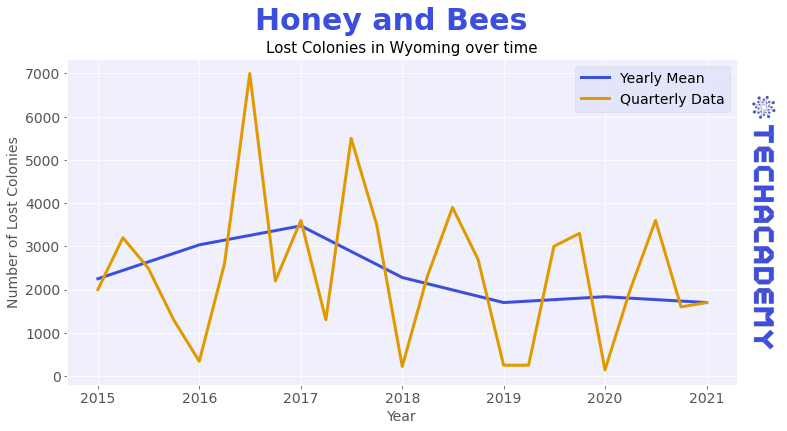

In [21]:
state = "Wyoming"
suptitle = "Honey and Bees"
title = f"Lost Colonies in {state} over time"
fig, ax = plt.subplots(figsize=(12,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Number of Lost Colonies')

# plot data
df1 = bees_grped[state:state]
df2 = bees[state:state]
ax.plot(df1.Date, df1.lost_cols, label="Yearly Mean")
ax.plot(df2.Date, df2["Lost Colonies"], label="Quarterly Data")

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

ax.legend(loc="upper right", fontsize=14)
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

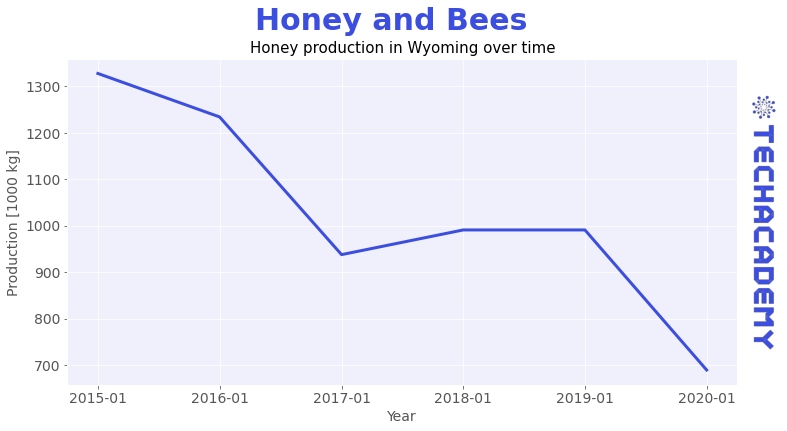

In [22]:
# average production by state
avg_state_prod = honey.groupby(honey.index)["production_kg"].mean()
# production by state and year
state_year_prod = honey.groupby([honey.index, honey.Year])["production_kg"].sum()

state = "Wyoming"
suptitle = "Honey and Bees"
title = f"Honey production in {state} over time"
fig, ax = plt.subplots(figsize=(12,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Production [1000 kg]')

# plot data
df = state_year_prod[state:state]
ax.plot(df.index.get_level_values('Year'), df.values)

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
# date formatting
ax.xaxis.set_major_formatter(myFmt)
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

## Task 9: Merge

In [23]:
bees_grped

Date  starting_cols  max_cols  lost_cols  added_cols  \
State                                                                
Alabama 2015-01-01         7750.0    7875.0     1167.5      1235.0   
Alabama 2016-01-01         7625.0    7625.0     1110.0       947.5   
Alabama 2017-01-01         7000.0    7625.0      982.5       752.5   
Alabama 2018-01-01         7375.0    7750.0     1000.0      1177.5   
Alabama 2019-01-01         6375.0    6750.0      737.5       725.0   
...            ...            ...       ...        ...         ...   
Wyoming 2017-01-01        21125.0   28000.0     3475.0      3225.0   
Wyoming 2018-01-01        19250.0   25750.0     2280.0      1897.5   
Wyoming 2019-01-01        16000.0   18500.0     1700.0       650.0   
Wyoming 2020-01-01        19375.0   26500.0     1835.0      1412.5   
Wyoming 2021-01-01        13000.0   14500.0     1700.0       500.0   

         renovated_cols  perc_renovated  varroa_mites_perc  \
State                                                        
Alabama           312.5            4.25             23.225   
Alabama           210.0            7.75             14.450   
Alabama           567.5            8.00             32.400   
Alabama          1202.5           15.75             38.125   
Alabama           327.5            4.50             32.425   
...                 ...             ...                ...   
Wyoming          1830.0            5.75             23.525   
Wyoming          1525.0            4.75             22.425   
Wyoming           997.5            3.75             18.675   
Wyoming          2510.0            8.25             22.250   
Wyoming          1200.0            8.00             19.200   

         other_pest_parasites_perc  diseases_perc  pesticides_perc  \
State                                                                
Alabama                     31.225          2.250            1.825   
Alabama                     20.525          1.275            4.000   
Alabama                     13.900          2.250           13.075   
Alabama                     36.850          1.300           11.350   
Alabama                     25.325          1.650            4.950   
...                            ...            ...              ...   
Wyoming                      1.875          7.625            3.275   
Wyoming                      2.775          1.750            4.475   
Wyoming                      3.175          1.675            0.550   
Wyoming                      9.225          0.400            2.350   
Wyoming                      0.000          0.700            0.000   

         other_perc  unknown_perc   Latitude   Longitude  \
State                                                      
Alabama       4.325         8.275  32.601011  -86.680736   
Alabama       4.275         8.450  32.601011  -86.680736   
Alabama       6.325         5.925  32.601011  -86.680736   
Alabama       7.300         5.225  32.601011  -86.680736   
Alabama       7.800         7.200  32.601011  -86.680736   
...             ...           ...        ...         ...   
Wyoming       5.000         1.925  43.000325 -107.554567   
Wyoming       2.225         2.500  43.000325 -107.554567   
Wyoming       2.900         5.075  43.000325 -107.554567   
Wyoming       2.075         1.300  43.000325 -107.554567   
Wyoming       3.300         7.900  43.000325 -107.554567   

         lost_colonies_percent  
State                           
Alabama              15.090377  
Alabama              14.501488  
Alabama              13.075014  
Alabama              12.837406  
Alabama              11.152024  
...                        ...  
Wyoming              13.214137  
Wyoming               7.641705  
Wyoming               7.039996  
Wyoming               6.119608  
Wyoming              11.724138  

[315 rows x 16 columns]

In [24]:
honey

Year  honey_producing_colonies  yield_colony_kg  \
State                                                                 
Alabama       2015-01-01                         7            21.32   
Arizona       2015-01-01                        26            22.23   
Arkansas      2015-01-01                        24            32.66   
California    2015-01-01                       275            13.61   
Colorado      2015-01-01                        29            23.13   
...                  ...                       ...              ...   
West Virginia 2020-01-01                         6            20.87   
Wisconsin     2020-01-01                        45            22.68   
Wyoming       2020-01-01                        38            18.14   
Other         2020-01-01                        33            19.05   
United States 2020-01-01                      2706            24.72   

               production_kg  stock_price_kg  avg_price_kg  prod_value  
State                                                                   
Alabama               149.23            0.59          1.74        1260  
Arizona               577.88           13.88          0.98        2765  
Arkansas              783.81            5.49          0.92        3491  
California           3742.13           67.36          0.93       16830  
Colorado              670.86           18.10          0.99        3224  
...                      ...             ...           ...         ...  
West Virginia         125.19            2.63          1.76        1074  
Wisconsin            1020.58           38.78          1.48        7335  
Wyoming               689.46           27.58          0.75        2523  
Other                 623.69           13.74          1.98        5995  
United States       66947.46         1801.44          0.92      299616  

[252 rows x 7 columns]

In [25]:
bees_and_honey = bees_grped.merge(honey, left_on=["State", "Date"], right_on=["State", "Year"]).sort_values(by=["State", "Date"])
bees_and_honey

# Observe that we have lost quite a few observations with this inner merge as the bees data set is more comprehensive than the honey set
set(bees.index.unique()).difference(set(bees_and_honey.index.unique()))

{'Connecticut', 'Maryland', 'Massachusetts', 'New Mexico', 'Oklahoma'}

In [26]:
print(len(bees.index.unique()))
print(len(honey.index.unique()))
print(len(bees_and_honey.index.unique()))

45
42
40


## Task 10: Bar Plot Starting Colonies Sorted by lowest to highest, + line for mean

In [27]:
# Only most recent, January 2020, observations
bee_pop_20 = pd.DataFrame(bees_and_honey.loc[bees_and_honey.Date >= '2020'])
# change string objects to numerics (done earlier)
# bee_pop_20["starting_cols"] = pd.to_numeric(bee_pop_20["starting_cols"])
# sort ascending (this wont work as intended if the value are string objects)
bee_pop_20 = bee_pop_20.sort_values(by="starting_cols")

In [28]:
bee_pop_20.starting_cols

State
Maine               5350.0
Kansas              6250.0
West Virginia       7250.0
Vermont             7250.0
Missouri            7375.0
Virginia            7500.0
Alabama            10000.0
Kentucky           10250.0
Indiana            11750.0
New Jersey         12250.0
Tennessee          12500.0
Illinois           12625.0
South Carolina     13750.0
Colorado           17250.0
Hawaii             18000.0
Ohio               18500.0
Arkansas           18625.0
Wyoming            19375.0
North Carolina     20375.0
Utah               21500.0
Pennsylvania       23125.0
Iowa               25500.0
Arizona            27000.0
Nebraska           28875.0
Mississippi        29000.0
Wisconsin          42750.0
New York           44000.0
Louisiana          47750.0
Montana            71250.0
Minnesota          73250.0
Washington         73750.0
Michigan           79250.0
Idaho              92000.0
Oregon            102500.0
South Dakota      114125.0
Georgia           143750.0
Texas             2265

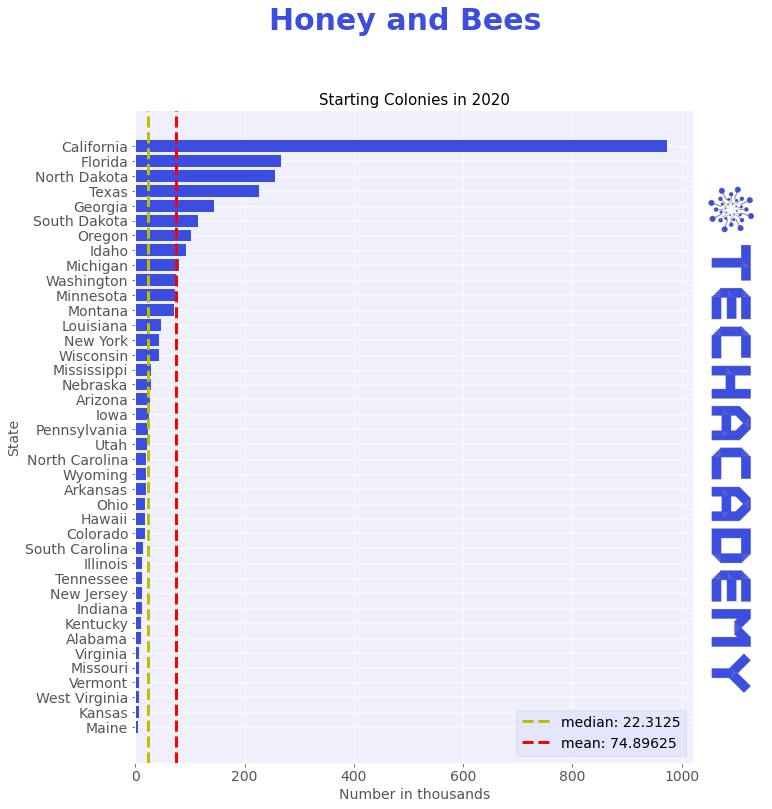

In [29]:
suptitle = "Honey and Bees"
title = f"Starting Colonies in 2020"
fig, ax = plt.subplots(figsize=(10,12))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.ylabel('State')
plt.xlabel('Number in thousands')

# plot data
ax.barh(bee_pop_20.index,bee_pop_20.starting_cols/1000)
median = bee_pop_20.starting_cols.median()/1000
mean = bee_pop_20.starting_cols.mean()/1000
plt.axvline(median, color='y', linestyle='--', label=f'median: {median}')
plt.axvline(mean, color='r', linestyle='--', label=f'mean: {mean}')
plt.legend(fontsize=14)

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([0.8, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

## Task 11: Splitting the Data

In [30]:
# unclear task in my opinion -> why?
k=np.array_split(bees_and_honey.sort_index(), 4)
k[1]

Date  starting_cols  max_cols  lost_cols  added_cols  \
State                                                                    
Indiana     2015-01-01        10875.0   12125.0     1525.0      1732.5   
Indiana     2016-01-01         6950.0    7625.0      697.5       800.0   
Indiana     2017-01-01         9750.0   10750.0     1432.5      1360.0   
Indiana     2018-01-01         8875.0    9500.0     1772.5      1215.0   
Indiana     2019-01-01        11375.0   12250.0     1202.5      1700.0   
Indiana     2020-01-01        11750.0   12250.0     1262.5      1860.0   
Iowa        2015-01-01        22250.0   28375.0     2950.0      2220.0   
Iowa        2016-01-01        31875.0   35750.0     3875.0      9147.5   
Iowa        2017-01-01        26750.0   31625.0     3525.0      6355.0   
Iowa        2018-01-01        40750.0   42250.0     3550.0      4400.0   
Iowa        2019-01-01        19250.0   22000.0     3525.0       960.0   
Iowa        2020-01-01        25500.0   30500.0     2950.0      6200.0   
Kansas      2015-01-01         7025.0    8000.0     1667.5       850.0   
Kansas      2016-01-01         5675.0    6000.0     1490.0      1227.5   
Kansas      2017-01-01         5275.0    5825.0      980.0      1242.5   
Kansas      2018-01-01         4775.0    4775.0      800.0      1147.5   
Kansas      2019-01-01         5950.0    5975.0     1437.5       537.5   
Kansas      2020-01-01         6250.0    7125.0     1187.5      1240.0   
Kentucky    2015-01-01         8375.0    9375.0     1870.0      1010.0   
Kentucky    2016-01-01         6750.0    6875.0      925.0       862.5   
Kentucky    2017-01-01         7500.0    7750.0     1167.5      1137.5   
Kentucky    2018-01-01         6125.0    6375.0     1237.5       655.0   
Kentucky    2019-01-01         5975.0    6450.0      760.0       252.5   
Kentucky    2020-01-01        10250.0   11375.0     1225.0      1695.0   
Louisiana   2015-01-01        50000.0   55500.0     4175.0      3250.0   
Louisiana   2016-01-01        51250.0   56250.0     6075.0      5587.5   
Louisiana   2017-01-01        55500.0   58250.0     5375.0      7497.5   
Louisiana   2018-01-01        50250.0   51250.0     2375.0      2682.5   
Louisiana   2019-01-01        45250.0   48000.0     3350.0      5617.5   
Louisiana   2020-01-01        47750.0   50250.0     2725.0      3132.5   
Maine       2015-01-01         4600.0   11800.0     1022.5      1115.0   
Maine       2016-01-01         3700.0    9425.0     1267.5       187.5   
Maine       2017-01-01         3975.0   12025.0      592.5       407.5   
Maine       2018-01-01         7150.0   12350.0     1450.0       180.0   
Maine       2019-01-01         9250.0    9375.0      702.5       147.5   
Maine       2020-01-01         5350.0   10575.0      615.0       465.0   
Michigan    2015-01-01        57625.0   77500.0     9250.0      6127.5   
Michigan    2016-01-01        68500.0   88500.0    10000.0      6702.5   
Michigan    2017-01-01        68750.0   89000.0    10375.0      6472.5   
Michigan    2018-01-01        54625.0   68000.0     7125.0      8475.0   
Michigan    2019-01-01        65500.0   69000.0     7750.0      3455.0   
Michigan    2020-01-01        79250.0   88000.0    13250.0     15100.0   
Minnesota   2015-01-01        84000.0  110000.0    14550.0      5482.5   
Minnesota   2016-01-01        77000.0  104000.0    14500.0      7825.0   
Minnesota   2017-01-01        73250.0  100750.0    10625.0      6525.0   
Minnesota   2018-01-01        78250.0   97750.0    13225.0     13525.0   
Minnesota   2019-01-01        90250.0   99000.0    16925.0      2520.0   
Minnesota   2020-01-01        73250.0  102000.0     8480.0      3325.0   
Mississippi 2015-01-01        44250.0   58250.0     6125.0      7065.0   
Mississippi 2016-01-01        35625.0   47500.0     4225.0     14520.0   
Mississippi 2017-01-01        39500.0   50750.0     3175.0      7257.5   
Mississippi 2018-01-01        25000.0   30875.0     2575.0      8110.0   
Mississippi 2019-01-01

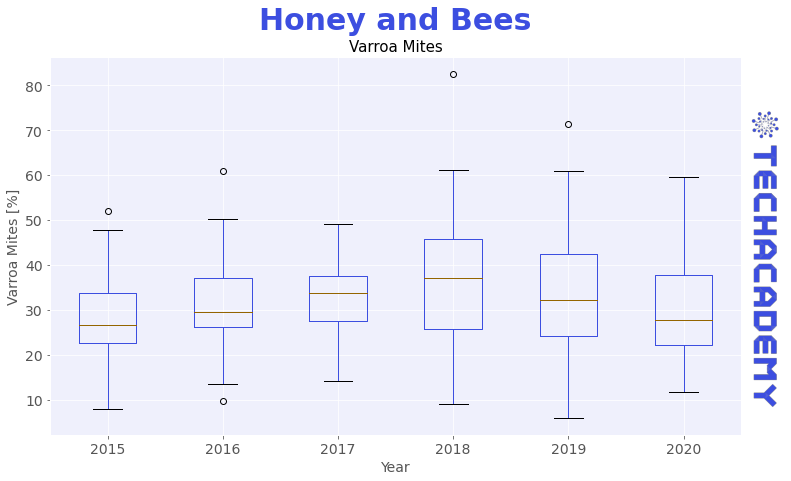

In [31]:
# Varroa Mites
suptitle = "Honey and Bees"
title = "Varroa Mites"
fig, ax = plt.subplots(figsize=(12,7))

df = bees_and_honey.copy()
df.boxplot(column="varroa_mites_perc", by="Year", ax=ax)
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Varroa Mites [%]')
ax.set_xticklabels(honey.Year.dt.year.unique())

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

## Task 12: Boxplot by year Honey Production, Varroa Mites, Precipitation, Bee Colonies

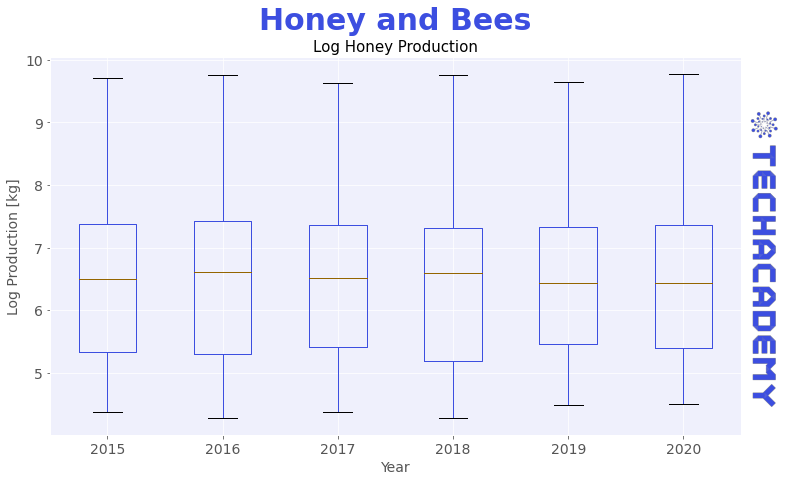

In [32]:
# Honey Production
suptitle = "Honey and Bees"
title = "Log Honey Production"
fig, ax = plt.subplots(figsize=(12,7))

df = bees_and_honey.copy()
df.production_kg = np.log(df.production_kg)  # normalize or choose quantiles
df.boxplot(column="production_kg", by="Year", ax=ax)
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Log Production [kg]')
ax.set_xticklabels(honey.Year.dt.year.unique())

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

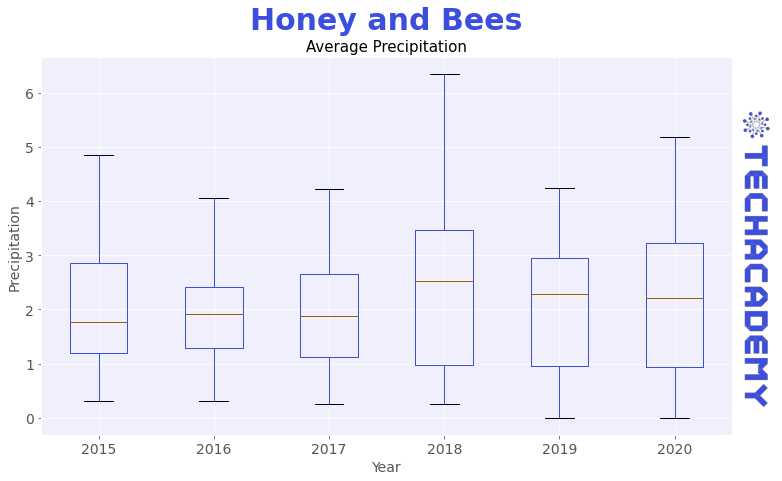

In [33]:
# Precipitation
suptitle = "Honey and Bees"
title = "Average Precipitation"
fig, ax = plt.subplots(figsize=(12,7))

# gotta work on the weather set first, actually (NAs etc.) ...
df = weather.copy()
df = df.groupby([weather.index, weather.datetime.dt.year])["precip"].mean().reset_index(level=1)
df.boxplot(column="precip", by="datetime", ax=ax)
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Precipitation')
ax.set_xticklabels(honey.Year.dt.year.unique())

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

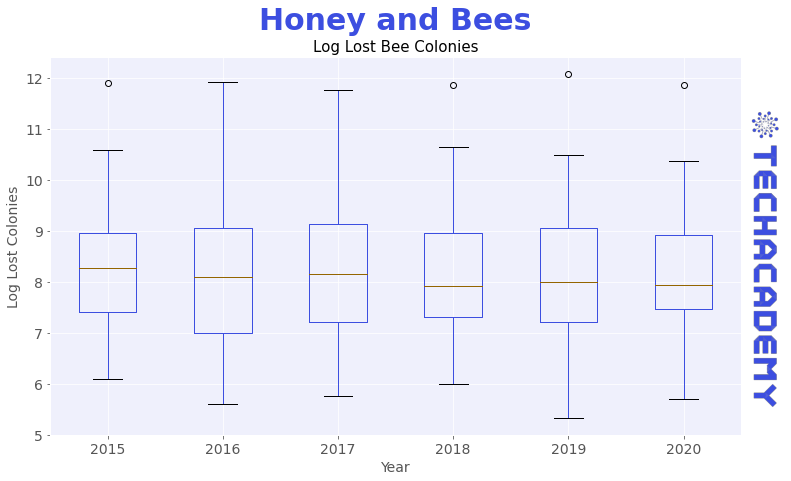

In [34]:
# Bee Colonies
# Honey Production
suptitle = "Honey and Bees"
title = "Log Lost Bee Colonies"
fig, ax = plt.subplots(figsize=(12,7))

df = bees_and_honey.copy()
df.max_cols = np.log(df.lost_cols)  # normalize or choose quantiles
df.boxplot(column="max_cols", by="Year", ax=ax)
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Log Lost Colonies')
ax.set_xticklabels(honey.Year.dt.year.unique())

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

## Task 13: Heatmap

In [35]:
# animated
df = bees.copy()[['Date', 'Starting Colonies']]
df = df.sort_values('Date') # Make sure you sort the time horizon column in ascending order because this column may be in random order
# the animation frame only works with date strings!
df['Date'] = df['Date'].dt.date.astype(str)
#df = df.replace('(NA)', np.nan)
df['Starting Colonies'] = np.log(pd.to_numeric(df['Starting Colonies']))  # important to apply log because of the large discrepancies
df.rename(index=us_state_to_abbrev, inplace=True)
title = 'Bee starting colonies in the U.S. over time'
fig = px.choropleth(df,
                    locations=df.index,
                    locationmode="USA-states",
                    color='Starting Colonies',
                    color_continuous_scale="agsunset",
                    scope="usa",
                    animation_frame='Date',  # make sure 'Date' is string type and sorted in ascending order
                    animation_group='Starting Colonies'
                    )
fig.update_layout(
      title_text = title,
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black",
      title_x=0.45,
     )
fig.write_image(f"../Leitfaden/plot/{title}.jpg")
fig.show()

In [36]:
# not animated
year = 2020
df = bees.copy()[['Date', 'Starting Colonies']]
df = df.loc[df.Date.dt.year == year]
df['Starting Colonies'] = np.log(pd.to_numeric(df['Starting Colonies']))  # important to apply log because of the large discrepancies
df.rename(index=us_state_to_abbrev, inplace=True)
title = f'Log bee starting colonies in the U.S. in {str(year)}'
fig = px.choropleth(df,
                    locations=df.index,
                    locationmode="USA-states",
                    color='Starting Colonies',
                    color_continuous_scale="agsunset",
                    scope="usa",
                    )
fig.update_layout(
      title_text = title,
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black",
      title_x=0.45,
     )
fig.write_image(f"../Leitfaden/plot/{title}.jpg")
fig.show()

In [37]:
df = bees_and_honey.copy()
df = df.loc[df.Date.dt.year == year]
df

Date  starting_cols   max_cols  lost_cols  added_cols  \
State                                                                        
Alabama        2020-01-01        10000.0    12875.0     2327.5      2287.5   
Arizona        2020-01-01        27000.0    28500.0     5450.0      6400.0   
Arkansas       2020-01-01        18625.0    19625.0     1800.0      2145.0   
California     2020-01-01       972500.0  1252500.0   140750.0    149000.0   
Colorado       2020-01-01        17250.0    22000.0     3692.5      3932.5   
Florida        2020-01-01       266250.0   283750.0    32000.0     38000.0   
Georgia        2020-01-01       143750.0   150750.0    19375.0     23125.0   
Hawaii         2020-01-01        18000.0    18000.0     1250.0      2125.0   
Idaho          2020-01-01        92000.0   128500.0    16625.0     13225.0   
Illinois       2020-01-01        12625.0    12625.0     1750.0      2050.0   
Indiana        2020-01-01        11750.0    12250.0     1262.5      1860.0   
Iowa           2020-01-01        25500.0    30500.0     2950.0      6200.0   
Kansas         2020-01-01         6250.0     7125.0     1187.5      1240.0   
Kentucky       2020-01-01        10250.0    11375.0     1225.0      1695.0   
Louisiana      2020-01-01        47750.0    50250.0     2725.0      3132.5   
Maine          2020-01-01         5350.0    10575.0      615.0       465.0   
Michigan       2020-01-01        79250.0    88000.0    13250.0     15100.0   
Minnesota      2020-01-01        73250.0   102000.0     8480.0      3325.0   
Mississippi    2020-01-01        29000.0    32750.0     3725.0      5075.0   
Missouri       2020-01-01         7375.0     7500.0     1842.5      1627.5   
Montana        2020-01-01        71250.0    99500.0     6162.5      7125.0   
Nebraska       2020-01-01        28875.0    37250.0     3467.5      2587.5   
New Jersey     2020-01-01        12250.0    16000.0      937.5      1450.0   
New York       2020-01-01        44000.0    51750.0     3550.0      3532.5   
North Carolina 2020-01-01        20375.0    24500.0     2800.0      2437.5   
North Dakota   2020-01-01       255000.0   359250.0    31375.0     30625.0   
Ohio           2020-01-01        18500.0    20125.0     2800.0      2770.0   
Oregon         2020-01-01       102500.0   112750.0     8700.0     10000.0   
Pennsylvania   2020-01-01        23125.0    26500.0     1782.5      2237.5   
South Carolina 2020-01-01        13750.0    16875.0     1875.0      1717.5   
South Dakota   2020-01-01       114125.0   168000.0    21950.0     10255.0   
Tennessee      2020-01-01        12500.0    14000.0     1695.0      1720.0   
Texas          2020-01-01       226500.0   288250.0    30625.0     33500.0   
Utah           2020-01-01        21500.0    27250.0     2425.0      3700.0   
Vermont        2020-01-01         7250.0     7375.0      300.0       477.5   
Virginia       2020-01-01         7500.0     8000.0     1125.0      1845.0   
Washington     2020-01-01        73750.0    98750.0     7125.0      4145.0   
West Virginia  2020-01-01         7250.0     7750.0      690.0       632.5   
Wisconsin      2020-01-01        42750.0    52750.0     4900.0      4617.5   
Wyoming        2020-01-01        19375.0    26500.0     1835.0      1412.5   

                renovated_cols  perc_renovated  varroa_mites_perc  \
State                                                               
Alabama                 1107.5           19.50             39.150   
Arizona                 1805.0            8.25             25.100   
Arkansas                 500.0            2.75             37.300   
California            118000.0           10.75             33.850   
Colorado                2205.0           12.00             23.550   
Florida                18750.0            7.00             37.250   
Georgia                22000.0           14.75             45.975   
Hawaii                  2067.5           12.25             59.575   
Idaho                  10030.0           12.00        

In [38]:
df = bees_and_honey.copy()
df = df.loc[df.Date.dt.year == year]
# cute formatting
df[["max_cols", "lost_cols"]] = df[["max_cols", "lost_cols"]].astype(int).applymap(lambda x: f'{x:,}')
# Initiate the map
m = folium.Map(
    location=[39, -101],  # Central USA Coordinates
    zoom_start=5,
    tiles='Stamen Terrain '  # Map Style
)

# Use a for-loop to plot circles
for idx, row in df.iterrows():
    lat = row["Latitude"]
    lon =  row["Longitude"]
    honey_prod = row["production_kg"]
    stock_pr = row["stock_price_kg"]
    max_cols = row["max_cols"]
    lost_cols = row["lost_cols"]

    # Your code here
    popup_content = f"<b>Maximum Colonies</b>:<br><span> {max_cols}</span><br> \
    <b>Lost Colonies</b>:<br><span> {lost_cols}</span><br> <b>Honey Production</b>:<br><span> {honey_prod}</span><br> <b>Stock Price</b>:<br><span> {stock_pr}</span>"
    folium.Marker([lat, lon],
          popup=popup_content,
    tooltip='Click me!').add_to(m)
    folium.CircleMarker((lat, lon),
                    radius=4
                   ).add_to(m)

title_h2_html = f'<h2 style="text-align:center; line-height: 0px; margin-bottom:-2px; color:#3C4EE0">{year} Bee Colonies in the U.S.A.</h2>'
title_h3_html = '<h4 style="text-align:center; line-height: 0px; margin-bottom:15px; color:black" >Yearly Average Statistics</h4>'
title_html = title_h2_html + '<br>' + title_h3_html
m.get_root().html.add_child(folium.Element(title_html))

m  # Displays the map

# Advanced Section

## Merging Weather and Bees

In [39]:
bees["quarterly_dt"] = bees.Date.dt.to_period("Q")
weather["quarterly_dt"] = weather.datetime.dt.to_period("Q")
# quite a few weather columns are completely empty
weather_essentials = weather.dropna(axis=1, how='all')
# no data on New Mexico and Florida
weather_essentials.loc[weather_essentials.index == "New Mexico"]
weather_essentials = weather_essentials.loc[~weather_essentials.index.isin(["Florida", "New Mexico"])]  #"Hawaii",

In [40]:
# aggregate with simple means but NOT for the max / min variables!
columns = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin']
col_max = ["tempmax", "feelslikemax"]
col_min = ["tempmin", "feelslikemin"]
cols = weather_essentials.columns.drop(columns)
reduced_weather_essentials = pd.concat([weather_essentials.groupby([weather_essentials.index, weather_essentials.quarterly_dt])[cols].mean(), weather_essentials.groupby([weather_essentials.index, weather_essentials.quarterly_dt])[col_max].max(), weather_essentials.groupby([weather_essentials.index, weather_essentials.quarterly_dt])[col_min].min()], axis=1)
reduced_weather_essentials

latitude  longitude       temp  feelslike        dew  \
State_code quarterly_dt                                                         
Alabama    2015Q1          32.601    -86.681   9.508889   8.467778   3.942222   
           2015Q2          32.601    -86.681  22.627473  23.100000  17.712088   
           2015Q3          32.601    -86.681  25.821739  27.216304  21.133696   
           2015Q4          32.601    -86.681  15.893478  15.802174  11.970652   
           2016Q1          32.601    -86.681  10.989011  10.330769   5.110989   
...                           ...        ...        ...        ...        ...   
Wyoming    2019Q4          43.000   -107.555  -3.003261  -6.253261  -8.920652   
           2020Q1          43.000   -107.555  -4.492308  -8.332967  -9.574725   
           2020Q2          43.000   -107.555  11.105495   9.751648  -1.298901   
           2020Q3          43.000   -107.555  19.530435  19.028261   0.708696   
           2020Q4          43.000   -107.555   0.506522  -2.486957  -9.266304   

                          humidity    precip  precipcover  snowdepth  \
State_code quarterly_dt                                                
Alabama    2015Q1        72.147111  1.566556     8.333444        NaN   
           2015Q2        76.751868  1.879341     7.097253        NaN   
           2015Q3        77.849348  1.866848     6.340870        NaN   
           2015Q4        80.227065  3.915652    11.574457        NaN   
           2016Q1        70.745934  2.822747     7.787802        NaN   
...                            ...       ...          ...        ...   
Wyoming    2019Q4        68.109130  0.372935     3.487283        NaN   
           2020Q1        70.770330  0.360989     3.113407        NaN   
           2020Q2        47.948242  0.624835     2.930330        NaN   
           2020Q3        32.694565  0.133152     0.815217        NaN   
           2020Q4        53.486630  0.171848     1.856957        NaN   

                          windgust  ...     winddir  sealevelpressure  \
State_code quarterly_dt             ...                                 
Alabama    2015Q1        38.605128  ...  191.694444       1021.847778   
           2015Q2        39.669697  ...  164.123077       1017.416484   
           2015Q3        39.620000  ...  170.507609       1015.601087   
           2015Q4        32.429545  ...  149.811957       1019.061957   
           2016Q1        35.778333  ...  198.839560       1019.084615   
...                            ...  ...         ...               ...   
Wyoming    2019Q4        57.015152  ...  157.460870       1020.114130   
           2020Q1        54.642857  ...  174.134066       1018.860440   
           2020Q2        55.163095  ...  191.791209       1012.487912   
           2020Q3        51.517808  ...  184.229348       1013.752174   
           2020Q4        57.865000  ...  179.263043       1019.645652   

                         cloudcover  visibility  Group4  Group3  tempmax  \
State_code quarterly_dt                                                    
Alabama    2015Q1         23.354444   14.812222     1.0     1.0     27.2   
           2015Q2         16.114286   15.285714     1.0     1.0     35.5   
           2015Q3         16.291304   15.429348     1.0     1.0     36.5   
           2015Q4         27.982609   14.834783     1.0     1.0     29.2   
           2016Q1         24.869231   15.171429     1.0     1.0     30.4   
...                             ...         ...     ...     ...      ...   
Wyoming    2019Q4         25.010870   14.902174     4.0     3.0     21.7   
           2020Q1         22.268132   15.146154     4.0     3.0     14.4   
           2020Q2         22.918681   15.483516     4.0     3.0     31.7   
           2020Q3          5.813043   15.646739     4.0     3.0     33.8   
           2020Q4         15.610870   15.408696     4.0     3.0     25.2   

                         feelslikemax  tempmin  feelslikemin  
State_code quarterly_dt         

In [41]:
bees_and_weather = bees.merge(reduced_weather_essentials, left_on=["State", "quarterly_dt"], right_on=["quarterly_dt"], right_index=True)
bees_and_weather

Date  Starting Colonies  Maximum Colonies  Lost Colonies  \
State                                                                    
Alabama 2015-07-01             8500.0            9000.0         1400.0   
Alabama 2015-10-01             8000.0            8000.0          610.0   
Alabama 2016-01-01             7500.0            7500.0         1700.0   
Alabama 2015-04-01             7500.0            7500.0          860.0   
Alabama 2015-01-01             7000.0            7000.0         1800.0   
...            ...                ...               ...            ...   
Wyoming 2019-10-01            27000.0           28000.0         3300.0   
Wyoming 2020-01-01             4000.0           17000.0          140.0   
Wyoming 2020-04-01            17500.0           30000.0         2000.0   
Wyoming 2020-07-01            33000.0           34000.0         3600.0   
Wyoming 2020-10-01            23000.0           25000.0         1600.0   

         Added Colonies  Renovated Colonies  Percent Renovated  \
State                                                            
Alabama           160.0               260.0                3.0   
Alabama            80.0                60.0                1.0   
Alabama          2100.0                90.0                1.0   
Alabama          1900.0               680.0                9.0   
Alabama          2800.0               250.0                4.0   
...                 ...                 ...                ...   
Wyoming           100.0               490.0                2.0   
Wyoming           450.0                60.0                2.0   
Wyoming          4400.0              2100.0                7.0   
Wyoming           640.0              7500.0               22.0   
Wyoming           160.0               380.0                2.0   

         Varroa Mites (Percent)  Other pests and parasites (Percent)  \
State                                                                  
Alabama                    63.1                                 70.6   
Alabama                     3.1                                  6.4   
Alabama                    24.2                                 22.0   
Alabama                    16.7                                 42.5   
Alabama                    10.0                                  5.4   
...                         ...                                  ...   
Wyoming                    27.6                                 12.3   
Wyoming                    27.6                                 12.3   
Wyoming                    28.8                                 12.3   
Wyoming                    13.4                                 12.3   
Wyoming                    19.2                                  0.0   

         Diseases (percent)  ...     winddir  sealevelpressure  cloudcover  \
State                        ...                                             
Alabama                 0.2  ...  170.507609       1015.601087   16.291304   
Alabama                 0.2  ...  149.811957       1019.061957   27.982609   
Alabama                 4.3  ...  198.839560       1019.084615   24.869231   
Alabama                 4.3  ...  164.123077       1017.416484   16.114286   
Alabama                 4.3  ...  191.694444       1021.847778   23.354444   
...                     ...  ...         ...               ...         ...   
Wyoming                 3.2  ...  157.460870       1020.114130   25.010870   
Wyoming                 0.1  ...  174.134066       1018.860440   22.268132   
Wyoming                 0.1  ...  191.791209       1012.487912   22.918681   
Wyoming                 0.7  ...  184.229348       1013.752174    5.813043   
Wyoming                 0.7  ...  179.263043       1019.645652   15.610870   

        visibility  Group4  Group3  tempmax feelslikemax  tempmin  \
State                                                               
Alabama  15.429348     1.0     1.0     36.5         42.7     10.6   
Alabama  14.834783     1.0     1.

## Adding interesting things

In [42]:
bees_and_weather

Date  Starting Colonies  Maximum Colonies  Lost Colonies  \
State                                                                    
Alabama 2015-07-01             8500.0            9000.0         1400.0   
Alabama 2015-10-01             8000.0            8000.0          610.0   
Alabama 2016-01-01             7500.0            7500.0         1700.0   
Alabama 2015-04-01             7500.0            7500.0          860.0   
Alabama 2015-01-01             7000.0            7000.0         1800.0   
...            ...                ...               ...            ...   
Wyoming 2019-10-01            27000.0           28000.0         3300.0   
Wyoming 2020-01-01             4000.0           17000.0          140.0   
Wyoming 2020-04-01            17500.0           30000.0         2000.0   
Wyoming 2020-07-01            33000.0           34000.0         3600.0   
Wyoming 2020-10-01            23000.0           25000.0         1600.0   

         Added Colonies  Renovated Colonies  Percent Renovated  \
State                                                            
Alabama           160.0               260.0                3.0   
Alabama            80.0                60.0                1.0   
Alabama          2100.0                90.0                1.0   
Alabama          1900.0               680.0                9.0   
Alabama          2800.0               250.0                4.0   
...                 ...                 ...                ...   
Wyoming           100.0               490.0                2.0   
Wyoming           450.0                60.0                2.0   
Wyoming          4400.0              2100.0                7.0   
Wyoming           640.0              7500.0               22.0   
Wyoming           160.0               380.0                2.0   

         Varroa Mites (Percent)  Other pests and parasites (Percent)  \
State                                                                  
Alabama                    63.1                                 70.6   
Alabama                     3.1                                  6.4   
Alabama                    24.2                                 22.0   
Alabama                    16.7                                 42.5   
Alabama                    10.0                                  5.4   
...                         ...                                  ...   
Wyoming                    27.6                                 12.3   
Wyoming                    27.6                                 12.3   
Wyoming                    28.8                                 12.3   
Wyoming                    13.4                                 12.3   
Wyoming                    19.2                                  0.0   

         Diseases (percent)  ...     winddir  sealevelpressure  cloudcover  \
State                        ...                                             
Alabama                 0.2  ...  170.507609       1015.601087   16.291304   
Alabama                 0.2  ...  149.811957       1019.061957   27.982609   
Alabama                 4.3  ...  198.839560       1019.084615   24.869231   
Alabama                 4.3  ...  164.123077       1017.416484   16.114286   
Alabama                 4.3  ...  191.694444       1021.847778   23.354444   
...                     ...  ...         ...               ...         ...   
Wyoming                 3.2  ...  157.460870       1020.114130   25.010870   
Wyoming                 0.1  ...  174.134066       1018.860440   22.268132   
Wyoming                 0.1  ...  191.791209       1012.487912   22.918681   
Wyoming                 0.7  ...  184.229348       1013.752174    5.813043   
Wyoming                 0.7  ...  179.263043       1019.645652   15.610870   

        visibility  Group4  Group3  tempmax feelslikemax  tempmin  \
State                                                               
Alabama  15.429348     1.0     1.0     36.5         42.7     10.6   
Alabama  14.834783     1.0     1.

## Create Measure of Abnormal Infestation

In [43]:
# by quarter
k = bees_and_weather.copy().reset_index().set_index([bees_and_weather.Date.dt.quarter], drop=False)
dis_quarter_medians = bees_and_weather.copy().groupby([bees_and_weather.Date.dt.quarter])[["Varroa Mites (Percent)", "Other pests and parasites (Percent)", "Diseases (percent)", "Pesticides (percent)"]].median()
dis_quarter_medians.rename(columns={"Varroa Mites (Percent)": "vmp_qmedian", "Other pests and parasites (Percent)": "opapp_qmedian", "Diseases (percent)": "dp_qmedian", "Pesticides (percent)": "pp_qmedian"}, inplace=True)
bees_and_weather = pd.merge(left=k, right=dis_quarter_medians, left_index=True, right_index=True).set_index("State")  #.reset_index(level=1, drop=True)
bees_and_weather["abn_var_mites"] = bees_and_weather["Varroa Mites (Percent)"] - bees_and_weather.vmp_qmedian
bees_and_weather["abn_diseases"] = bees_and_weather["Diseases (percent)"] - bees_and_weather.dp_qmedian

In [44]:
# by state and quarter
k = bees_and_weather.copy().set_index([bees_and_weather.index, bees_and_weather.Date.dt.quarter], drop=False)
dis_quarter_means = bees_and_weather.copy().groupby(["State", bees_and_weather.Date.dt.quarter])[["temp", "precip", "humidity", "cloudcover"]].mean()
dis_quarter_means.rename(columns={"temp": "temp_qmean", "precip": "precip_qmean", "humidity": "humidity_qmean", "cloudcover": "cloudcover_qmean"}, inplace=True)
bees_and_weather = pd.merge(left=k, right=dis_quarter_means, left_index=True, right_index=True).reset_index(level=1, drop=True)
bees_and_weather["abn_temp"] = bees_and_weather["temp"] - bees_and_weather.temp_qmean
bees_and_weather["abn_precip"] = bees_and_weather["precip"] - bees_and_weather.precip_qmean
bees_and_weather["abn_cloudcover"] = bees_and_weather["cloudcover"] - bees_and_weather.cloudcover_qmean
bees_and_weather["abn_humidity"] = bees_and_weather["humidity"] - bees_and_weather.humidity_qmean
bees_and_weather

Date  Starting Colonies  Maximum Colonies  Lost Colonies  \
State                                                                    
Alabama 2016-01-01             7500.0            7500.0         1700.0   
Alabama 2015-01-01             7000.0            7000.0         1800.0   
Alabama 2019-01-01             5500.0            5500.0          650.0   
Alabama 2017-01-01             7000.0            7000.0         1600.0   
Alabama 2018-01-01             7500.0            7500.0          820.0   
...            ...                ...               ...            ...   
Wyoming 2016-10-01            25000.0           27000.0         2200.0   
Wyoming 2017-10-01            28000.0           29000.0         3500.0   
Wyoming 2018-10-01            30000.0           32000.0         2700.0   
Wyoming 2019-10-01            27000.0           28000.0         3300.0   
Wyoming 2020-10-01            23000.0           25000.0         1600.0   

         Added Colonies  Renovated Colonies  Percent Renovated  \
State                                                            
Alabama          2100.0                90.0                1.0   
Alabama          2800.0               250.0                4.0   
Alabama           800.0               200.0                4.0   
Alabama           570.0               740.0               11.0   
Alabama          1200.0              1500.0               20.0   
...                 ...                 ...                ...   
Wyoming            50.0                 0.0                0.0   
Wyoming          2500.0               320.0                1.0   
Wyoming           220.0                 0.0                0.0   
Wyoming           100.0               490.0                2.0   
Wyoming           160.0               380.0                2.0   

         Varroa Mites (Percent)  Other pests and parasites (Percent)  \
State                                                                  
Alabama                    24.2                                 22.0   
Alabama                    10.0                                  5.4   
Alabama                    27.2                                 22.7   
Alabama                    19.9                                  9.8   
Alabama                    29.2                                 30.2   
...                         ...                                  ...   
Wyoming                    32.2                                  1.6   
Wyoming                    38.0                                  2.4   
Wyoming                    43.9                                  7.9   
Wyoming                    27.6                                 12.3   
Wyoming                    19.2                                  0.0   

         Diseases (percent)  ...  abn_var_mites  abn_diseases  temp_qmean  \
State                        ...                                            
Alabama                 4.3  ...            5.6          3.50   11.655739   
Alabama                 4.3  ...           -8.6          3.50   11.655739   
Alabama                 1.8  ...            8.6          1.00   11.655739   
Alabama                 0.2  ...            1.3         -0.60   11.655739   
Alabama                 1.9  ...           10.6          1.10   11.655739   
...                     ...  ...            ...           ...         ...   
Wyoming                 3.1  ...            2.9          1.35   -0.351087   
Wyoming                 8.4  ...            8.7          6.65   -0.351087   
Wyoming                 2.6  ...           14.6          0.85   -0.351087   
Wyoming                 3.2  ...           -1.7          1.45   -0.351087   
Wyoming                 0.7  ...          -10.1         -1.05   -0.351087   

        precip_qmean  humidity_qmean  cloudcover_qmean  abn_temp abn_precip  \
State                                                                         
Alabama     2.975459       72.916567         26.966227 -0.666728  -0.152711   
Alabama     2.97

## More interesting stuff

In [45]:
# Quarter Dummies
bees_and_weather = pd.concat([bees_and_weather, pd.get_dummies(bees_and_weather.Date.dt.quarter, prefix="quarter")], axis=1)
bees_and_weather["tmp_difference"] = bees_and_weather["tempmax"] - bees_and_weather["tempmin"]
bees_and_weather.groupby("State")["temp"].var()
bees_and_weather["log_lost_cols"] = np.log(bees_and_weather["Lost Colonies"])
bees_and_weather["log_max_cols"] = np.log(bees_and_weather["Maximum Colonies"])
bees_and_weather

c:\users\thilo\onedrive\studium\techacademy\sose22\python\venv\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



Date  Starting Colonies  Maximum Colonies  Lost Colonies  \
State                                                                    
Alabama 2016-01-01             7500.0            7500.0         1700.0   
Alabama 2015-01-01             7000.0            7000.0         1800.0   
Alabama 2019-01-01             5500.0            5500.0          650.0   
Alabama 2017-01-01             7000.0            7000.0         1600.0   
Alabama 2018-01-01             7500.0            7500.0          820.0   
...            ...                ...               ...            ...   
Wyoming 2016-10-01            25000.0           27000.0         2200.0   
Wyoming 2017-10-01            28000.0           29000.0         3500.0   
Wyoming 2018-10-01            30000.0           32000.0         2700.0   
Wyoming 2019-10-01            27000.0           28000.0         3300.0   
Wyoming 2020-10-01            23000.0           25000.0         1600.0   

         Added Colonies  Renovated Colonies  Percent Renovated  \
State                                                            
Alabama          2100.0                90.0                1.0   
Alabama          2800.0               250.0                4.0   
Alabama           800.0               200.0                4.0   
Alabama           570.0               740.0               11.0   
Alabama          1200.0              1500.0               20.0   
...                 ...                 ...                ...   
Wyoming            50.0                 0.0                0.0   
Wyoming          2500.0               320.0                1.0   
Wyoming           220.0                 0.0                0.0   
Wyoming           100.0               490.0                2.0   
Wyoming           160.0               380.0                2.0   

         Varroa Mites (Percent)  Other pests and parasites (Percent)  \
State                                                                  
Alabama                    24.2                                 22.0   
Alabama                    10.0                                  5.4   
Alabama                    27.2                                 22.7   
Alabama                    19.9                                  9.8   
Alabama                    29.2                                 30.2   
...                         ...                                  ...   
Wyoming                    32.2                                  1.6   
Wyoming                    38.0                                  2.4   
Wyoming                    43.9                                  7.9   
Wyoming                    27.6                                 12.3   
Wyoming                    19.2                                  0.0   

         Diseases (percent)  ...  abn_precip  abn_cloudcover  abn_humidity  \
State                        ...                                             
Alabama                 4.3  ...   -0.152711       -2.096996     -2.170633   
Alabama                 4.3  ...   -1.408903       -3.611783     -0.769456   
Alabama                 1.8  ...   -0.936792        2.948217      0.676988   
Alabama                 0.2  ...    0.120875       -0.597338     -1.122678   
Alabama                 1.9  ...   -0.816570        3.055995     -0.625345   
...                     ...  ...         ...             ...           ...   
Wyoming                 3.1  ...    0.334094       -3.634964      0.358822   
Wyoming                 8.4  ...    0.047572       -1.665399      1.025996   
Wyoming                 2.6  ...   -0.066449        7.000906      2.115453   
Wyoming                 3.2  ...   -0.041014        2.403080      6.690996   
Wyoming                 0.7  ...   -0.242101       -6.996920     -7.931504   

        quarter_1  quarter_2  quarter_3  quarter_4 tmp_difference  \
State                                                               
Alabama         1          0          0          0           35.1   
Alabama         1          0     

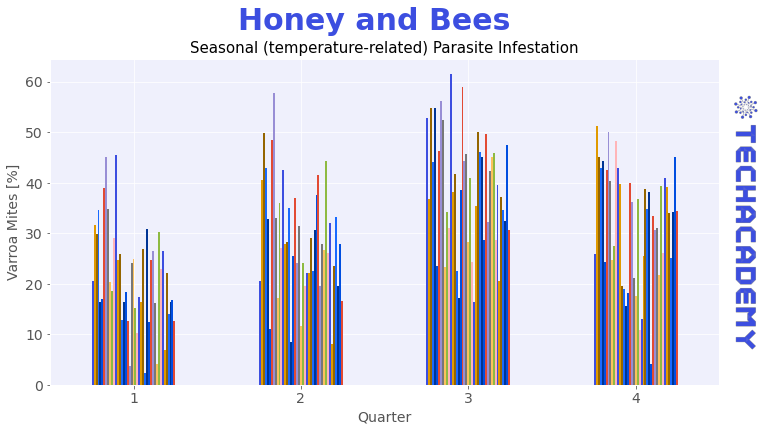

In [46]:
df22 = bees_and_weather.groupby(["State", bees_and_weather.Date.dt.quarter])["Varroa Mites (Percent)"].mean()

title = "Seasonal (temperature-related) Parasite Infestation"
fig, ax = plt.subplots(figsize=(12,6))

df22.unstack(level=0).plot(kind='bar', ax=ax, rot=0)

plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.ylabel('Varroa Mites [%]')
plt.xlabel('Quarter')
ax.get_legend().remove()
#plt.legend(fontsize='7', ncol=3, handleheight=4, labelspacing=0.03, loc=(1.08,0))

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

## Correlations

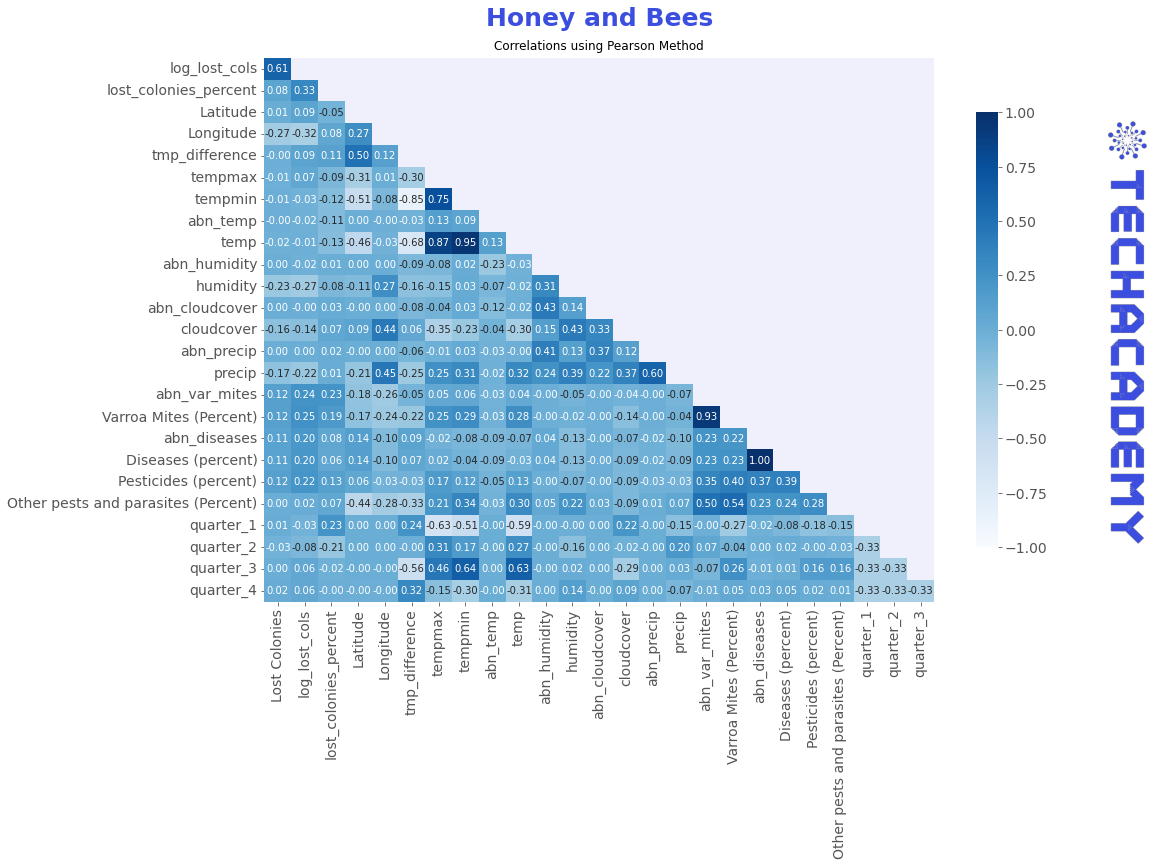

In [47]:
suptitle = "Honey and Bees"
title = "Correlations using Pearson Method"
fig, ax = plt.subplots(figsize=(15,10))

columns = ["Lost Colonies", "log_lost_cols", "lost_colonies_percent", "Latitude", "Longitude", "tmp_difference", "tempmax", "tempmin", "abn_temp", "temp",  "abn_humidity", "humidity", "abn_cloudcover", "cloudcover", "abn_precip", "precip", "abn_var_mites", "Varroa Mites (Percent)",  "abn_diseases", "Diseases (percent)", "Pesticides (percent)", "Other pests and parasites (Percent)",  "quarter_1", "quarter_2", "quarter_3", "quarter_4",]
df = bees_and_weather[columns].corr()

mask = np.triu(np.ones_like(df, dtype=bool))
mask = mask[1:, :-1]

corr = df.iloc[1:,:-1].copy()

ax.text(y=1.05, x=0.5, s=suptitle, c='#3C4EE0', fontsize=25, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(y=1.01, x=0.5, s=title, fontsize=12, alpha=1, ha='center', va='bottom', transform=ax.transAxes)

sns.heatmap(corr, mask=mask, ax=ax, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.yticks(rotation=0)

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

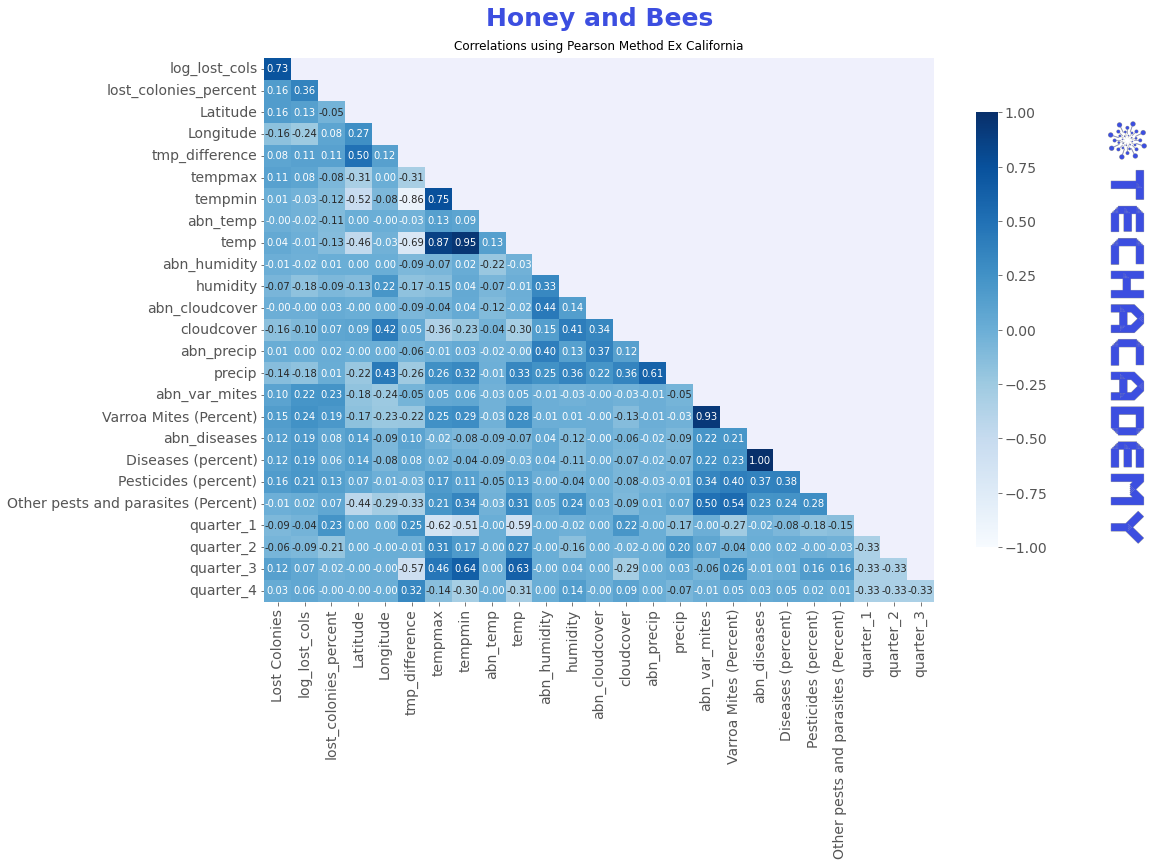

In [48]:
suptitle = "Honey and Bees"
title = "Correlations using Pearson Method Ex California"
fig, ax = plt.subplots(figsize=(15,10))

df = bees_and_weather.loc[bees_and_weather.index != "California"]
df = df[columns].corr()

mask = np.triu(np.ones_like(df, dtype=bool))
mask = mask[1:, :-1]

corr = df.iloc[1:,:-1].copy()

ax.text(y=1.05, x=0.5, s=suptitle, c='#3C4EE0', fontsize=25, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(y=1.01, x=0.5, s=title, fontsize=12, alpha=1, ha='center', va='bottom', transform=ax.transAxes)

sns.heatmap(corr, mask=mask, ax=ax, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.yticks(rotation=0   )

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

In [49]:
columns += ["quarter_1", "quarter_2", "quarter_3"]
columns = list(set(columns))
df = bees_and_weather.copy()#.loc[bees_and_weather.index != "California"]
statewise_corr = df.groupby(df.index)[columns].corr().unstack(level=1)
statewise_corr

lost_colonies_percent                                         \
               lost_colonies_percent   tempmax Latitude  abn_temp quarter_1   
State                                                                         
Alabama                          1.0 -0.066179      NaN -0.383237  0.142180   
Arizona                          1.0 -0.188805      NaN -0.120329  0.043473   
Arkansas                         1.0 -0.330393      NaN -0.062973  0.300214   
California                       1.0 -0.733236      NaN -0.114401  0.578136   
Colorado                         1.0  0.160657      NaN  0.323658 -0.308381   
Connecticut                      1.0 -0.716372      NaN -0.336755  0.557854   
Georgia                          1.0 -0.108860      NaN  0.046720  0.132167   
Hawaii                           1.0  0.229194      NaN  0.413117 -0.051677   
Idaho                            1.0  0.072199      NaN -0.369690 -0.216445   
Illinois                         1.0 -0.566230      NaN -0.331923  0.708456   
Indiana                          1.0 -0.334931      NaN -0.085650  0.274364   
Iowa                             1.0 -0.376375      NaN -0.058599  0.291095   
Kansas                           1.0 -0.177335      NaN  0.108085  0.227228   
Kentucky                         1.0 -0.506322      NaN -0.413591  0.526839   
Louisiana                        1.0 -0.288358      NaN -0.280105  0.403802   
Maine                            1.0 -0.275422      NaN  0.058740  0.393578   
Maryland                         1.0 -0.593213      NaN -0.211253  0.695238   
Massachusetts                    1.0 -0.539163      NaN -0.185460  0.587438   
Michigan                         1.0 -0.218339      NaN -0.206360  0.273278   
Minnesota                        1.0  0.531702      NaN  0.069021 -0.496389   
Mississippi                      1.0  0.089686      NaN -0.138272  0.038078   
Missouri                         1.0 -0.382218      NaN  0.059929  0.580261   
Montana                          1.0  0.343915      NaN  0.016906 -0.519275   
Nebraska                         1.0  0.035084      NaN -0.267564 -0.339062   
New Jersey                       1.0 -0.443058      NaN -0.114665  0.576005   
New York                         1.0 -0.392691      NaN -0.355478  0.422750   
North Carolina                   1.0 -0.304663      NaN -0.492911  0.203673   
North Dakota                     1.0  0.586412      NaN  0.277560 -0.561017   
Ohio                             1.0 -0.743971      NaN -0.315728  0.796649   
Oklahoma                         1.0 -0.025443      NaN -0.002606  0.303000   
Oregon                           1.0  0.027556      NaN  0.025132 -0.225117   
Pennsylvania                     1.0 -0.759568      NaN -0.372246  0.649156   
South Carolina                   1.0 -0.158581      NaN -0.352181  0.133800   
South Dakota                     1.0  0.413035      NaN  0.134663 -0.293387   
Tennessee                        1.0 -0.379222      NaN -0.111928  0.527517   
Texas                            1.0  0.002854      NaN  0.419982  0.107817   
Utah                             1.0  0.193413      NaN -0.268028 -0.063486   
Vermont                          1.0 -0.593906      NaN  0.008951  0.541598   
Virginia                         1.0 -0.638861      NaN -0.293827  0.714052   
Washington                       1.0  0.114352      NaN -0.225266 -0.170448   
West Virginia                    1.0 -0.619205      NaN -0.403733  0.621964   
Wisconsin                        1.0 -0.386457      NaN -0.445884  0.381592   
Wyoming                          1.0  0.233699      NaN  0.202802 -0.106234   

                                                                            \
               abn_humidity abn_precip Other pests and parasites (Percent)   
State                                                                        
Alabama           -0.111495  -0.028843                            0.012008   
Arizona            0.104079   0.059038                            0.

In [50]:
states_by_latitude = bees_and_weather.reset_index()[["Latitude", "State"]].drop_duplicates().sort_values("Latitude")
states_by_latitude

Latitude           State
168   20.460000          Hawaii
336   30.973377       Louisiana
840   31.169336           Texas
480   32.585106     Mississippi
0     32.601011         Alabama
144   32.678125         Georgia
768   33.625050  South Carolina
24    34.168219         Arizona
48    34.751928        Arkansas
624   35.214563  North Carolina
696   35.309765        Oklahoma
816   35.830521       Tennessee
72    37.271875      California
312   37.822294        Kentucky
912   38.003386        Virginia
504   38.304662        Missouri
288   38.498779          Kansas
384   38.806352        Maryland
936   38.899349      Washington
960   38.920170   West Virginia
96    38.997934        Colorado
864   39.499761            Utah
216   39.739318        Illinois
240   39.766219         Indiana
576   40.143006      New Jersey
672   40.190362            Ohio
600   40.705626        New York
744   40.994593    Pennsylvania
552   41.500819        Nebraska
120   41.518783     Connecticut
264   41.938317            Iowa
408   42.062940   Massachusetts
1008  43.000325         Wyoming
888   43.871755         Vermont
720   44.141905          Oregon
792   44.212699    South Dakota
984   44.786297       Wisconsin
432   44.943560        Michigan
360   45.218513           Maine
192   45.494576           Idaho
456   46.441859       Minnesota
528   46.679800         Montana
648   47.467882    North Dakota

In [51]:
corr_by_lat = statewise_corr.reindex(states_by_latitude["State"])
#corr_by_lat
corr_by_lat[("Lost Colonies", "tempmin")]

State
Hawaii            0.280862
Louisiana         0.057003
Texas            -0.575289
Mississippi      -0.060372
Alabama           0.195145
Georgia          -0.191733
South Carolina   -0.293244
Arizona          -0.096196
Arkansas         -0.141268
North Carolina   -0.347704
Oklahoma         -0.444037
Tennessee        -0.020916
California       -0.696009
Kentucky         -0.358770
Virginia         -0.561261
Missouri         -0.397063
Kansas            0.134820
Maryland         -0.533486
Washington        0.194209
West Virginia    -0.686717
Colorado          0.440156
Utah              0.521738
Illinois         -0.581031
Indiana          -0.162885
New Jersey       -0.074083
Ohio             -0.632934
New York          0.158701
Pennsylvania     -0.732867
Nebraska          0.352505
Connecticut      -0.517656
Iowa             -0.165573
Massachusetts    -0.036517
Wyoming           0.488715
Vermont          -0.493266
Oregon            0.016989
South Dakota      0.669958
Wisconsin         0.40

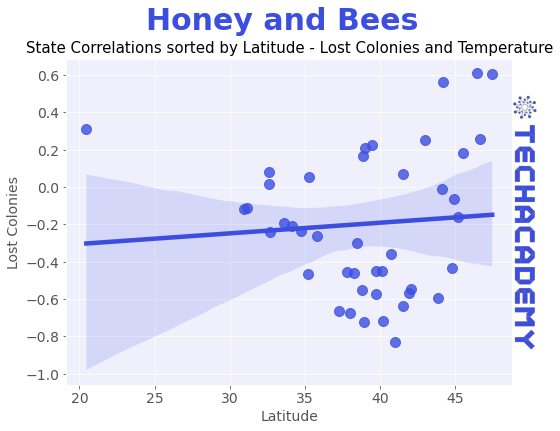

In [52]:
suptitle = "Honey and Bees"
title = "State Correlations sorted by Latitude - Lost Colonies and Temperature"
fig, ax = plt.subplots(figsize=(8,6))

sns.regplot(x=states_by_latitude["Latitude"], y=corr_by_lat[("lost_colonies_percent", "temp")])  # "Lost Colonies"

plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Lost Colonies')

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

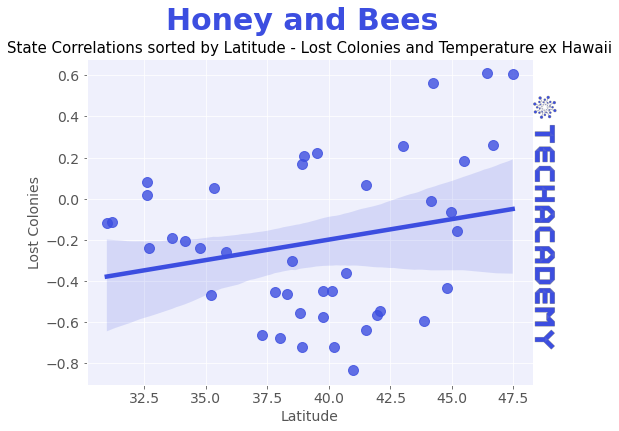

In [53]:
# exclude Hawaii
suptitle = "Honey and Bees"
title = "State Correlations sorted by Latitude - Lost Colonies and Temperature ex Hawaii"
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("lost_colonies_percent", "temp")])  # "Lost Colonies"
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Lost Colonies')
# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)
plt.show()

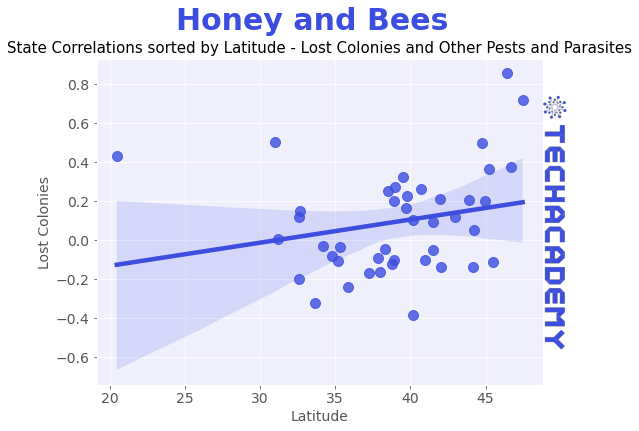

In [54]:
suptitle = "Honey and Bees"
title = "State Correlations sorted by Latitude - Lost Colonies and Other Pests and Parasites"
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=states_by_latitude["Latitude"], y=corr_by_lat[("Lost Colonies", "Other pests and parasites (Percent)")])  # "Lost Colonies"
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Lost Colonies')
# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)
plt.show()

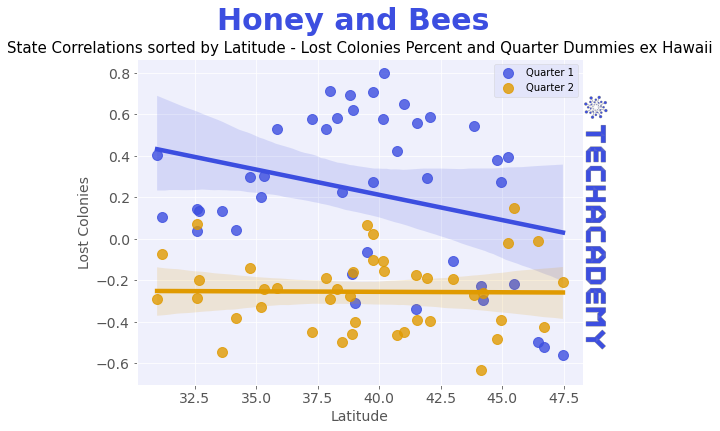

In [55]:
suptitle = "Honey and Bees"
title = "State Correlations sorted by Latitude - Lost Colonies Percent and Quarter Dummies ex Hawaii"
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("lost_colonies_percent", "quarter_1")], label="Quarter 1")  # "Lost Colonies"
#sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_2")])
sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("lost_colonies_percent", "quarter_2")], label="Quarter 2")
# sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_4")])
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Lost Colonies')
plt.legend()
# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)
plt.show()

In [56]:
corr_by_year = df.groupby(df.Date.dt.year).corr()
corr_by_quarter = df.groupby(df.Date.dt.quarter).corr()
corr_by_year.loc[2015:2020, "Lost Colonies"].xs("quarter_2", level=1, drop_level=False)
corr_by_quarter.loc[1:4, "Lost Colonies"].xs("temp", level=1, drop_level=False)  # even a naive correlation plot across all states but controlling for seasons shows varying effect of the temperature on lost colonies

Date      
1     temp    0.087596
2     temp   -0.048622
3     temp   -0.213094
4     temp   -0.056886
Name: Lost Colonies, dtype: float64

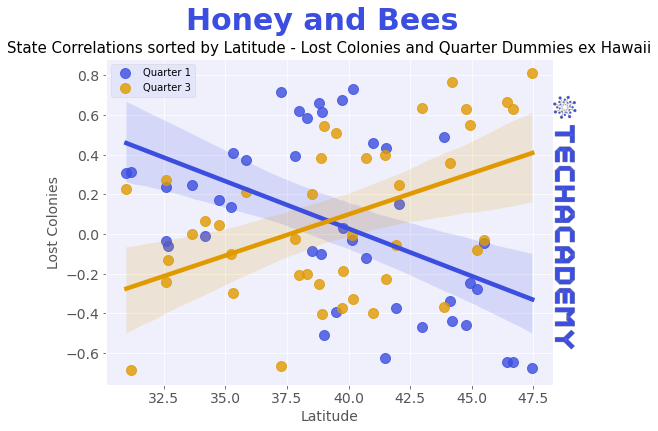

In [57]:
suptitle = "Honey and Bees"
title = "State Correlations sorted by Latitude - Lost Colonies and Quarter Dummies ex Hawaii"
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_1")], label="Quarter 1")
#sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_2")])
sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_3")], label="Quarter 3")
# sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_4")])
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Lost Colonies')
plt.legend()
# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)
plt.show()

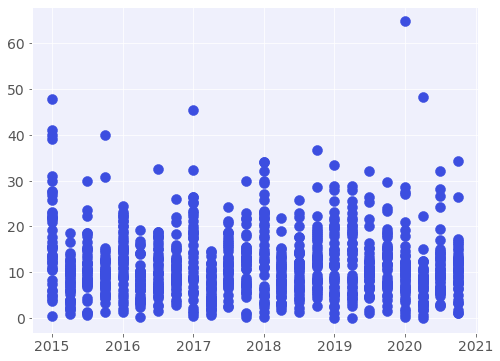

In [58]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(bees_and_weather.Date, bees_and_weather.lost_colonies_percent)
plt.show()

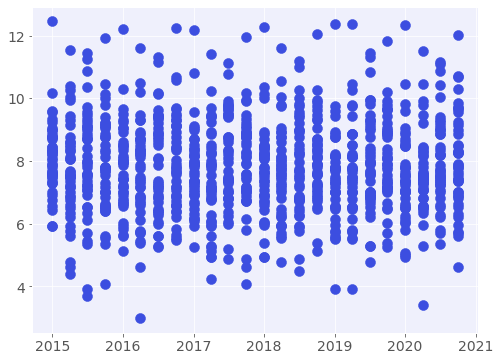

In [59]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(bees_and_weather.Date, bees_and_weather.log_lost_cols)
plt.show()

In [60]:
from linearmodels.panel import RandomEffects, PanelOLS
d_m = pd.get_dummies(bees_and_weather.index, prefix='state')
mod_frame = pd.concat([bees_and_weather.reset_index(), d_m], axis=1)
# kick out Hawaii and New Mexico and Florida since they do not have weather data
mod_frame = mod_frame.loc[~mod_frame.State.isin(["Hawaii", "Florida", "New Mexico"])]
mod_frame = mod_frame.set_index(["State", "Date"])
# constant when NOT using quarter dummies
mod_frame["constant"] = 1
mod_frame

Starting Colonies  Maximum Colonies  Lost Colonies  \
State   Date                                                             
Alabama 2016-01-01             7500.0            7500.0         1700.0   
        2015-01-01             7000.0            7000.0         1800.0   
        2019-01-01             5500.0            5500.0          650.0   
        2017-01-01             7000.0            7000.0         1600.0   
        2018-01-01             7500.0            7500.0          820.0   
...                               ...               ...            ...   
Wyoming 2016-10-01            25000.0           27000.0         2200.0   
        2017-10-01            28000.0           29000.0         3500.0   
        2018-10-01            30000.0           32000.0         2700.0   
        2019-10-01            27000.0           28000.0         3300.0   
        2020-10-01            23000.0           25000.0         1600.0   

                    Added Colonies  Renovated Colonies  Percent Renovated  \
State   Date                                                                
Alabama 2016-01-01          2100.0                90.0                1.0   
        2015-01-01          2800.0               250.0                4.0   
        2019-01-01           800.0               200.0                4.0   
        2017-01-01           570.0               740.0               11.0   
        2018-01-01          1200.0              1500.0               20.0   
...                            ...                 ...                ...   
Wyoming 2016-10-01            50.0                 0.0                0.0   
        2017-10-01          2500.0               320.0                1.0   
        2018-10-01           220.0                 0.0                0.0   
        2019-10-01           100.0               490.0                2.0   
        2020-10-01           160.0               380.0                2.0   

                    Varroa Mites (Percent)  \
State   Date                                 
Alabama 2016-01-01                    24.2   
        2015-01-01                    10.0   
        2019-01-01                    27.2   
        2017-01-01                    19.9   
        2018-01-01                    29.2   
...                                    ...   
Wyoming 2016-10-01                    32.2   
        2017-10-01                    38.0   
        2018-10-01                    43.9   
        2019-10-01                    27.6   
        2020-10-01                    19.2   

                    Other pests and parasites (Percent)  Diseases (percent)  \
State   Date                                                                  
Alabama 2016-01-01                                 22.0                 4.3   
        2015-01-01                                  5.4                 4.3   
        2019-01-01                                 22.7                 1.8   
        2017-01-01                                  9.8                 0.2   
        2018-01-01                                 30.2                 1.9   
...                                                 ...                 ...   
Wyoming 2016-10-01                                  1.6                 3.1   
        2017-10-01                                  2.4                 8.4   
        2018-10-01                                  7.9                 2.6   
        2019-10-01                                 12.3                 3.2   
        2020-10-01                                  0.0                 0.7   

                    Pesticides (percent)  ...  state_Tennessee  state_Texas  \
State   Date                              ...                                 
Alabama 2016-01-01                   8.1  ...                0            0   
        2015-01-01                   2.2  ...                0            0   
        2019-01-01                   0.3  ...                0            0   
        2017-01-01               

In [61]:
import statsmodels.api as sm
# balanced panel data set: yes
# log_lost_cols
cols = ["abn_var_mites", "precip", "abn_temp", "quarter_1", "quarter_2", "constant"]
#["humidity", "cloudcover", "precip", "Varroa Mites (Percent)", "constant", "quarter_1", "quarter_3",]  # "humidity", "temp", "cloudcover", "precip", "quarter_1", "quarter_2", "quarter_3", "quarter_4"
var = mod_frame.loc[:, cols]
naive_ols = sm.OLS(mod_frame.log_lost_cols, var).fit().get_robustcov_results()  # log_lost_cols "Lost Colonies" lost_colonies_percent
mod = RandomEffects(mod_frame.log_lost_cols, var)
model_fe = PanelOLS(mod_frame.log_lost_cols, var)  #, entity_effects=True, time_effects=True)
fe_res = model_fe.fit(cov_type='clustered')
re_res = mod.fit(cov_type='clustered', cluster_entity=True)  #cov_type="robust")
print(naive_ols.summary())
print(re_res)
print(fe_res)

                            OLS Regression Results                            
Dep. Variable:          log_lost_cols   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     32.50
Date:                Fri, 20 May 2022   Prob (F-statistic):           8.95e-31
Time:                        19:10:56   Log-Likelihood:                -1742.3
No. Observations:                1008   AIC:                             3497.
Df Residuals:                    1002   BIC:                             3526.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
abn_var_mites     0.0228      0.003      9.011

In [62]:
# lost_colonies_percent
cols = ["latitude", "quarter_1", "quarter_2", "abn_var_mites", "precipcover", "abn_temp", "constant"]
#["humidity", "cloudcover", "precip", "Varroa Mites (Percent)", "constant", "quarter_1", "quarter_3",]  # "humidity", "temp", "cloudcover", "precip", "quarter_1", "quarter_2", "quarter_3", "quarter_4"
var = mod_frame.loc[:, cols]
naive_ols = sm.OLS(mod_frame.lost_colonies_percent, var).fit().get_robustcov_results()  # log_lost_cols "Lost Colonies" lost_colonies_percent
mod = RandomEffects(mod_frame.lost_colonies_percent, var)
pooled_1 = PanelOLS(mod_frame.lost_colonies_percent, var)  #entity_effects=True
pooled_1_res = pooled_1.fit(cov_type='clustered')

cols = ["quarter_1", "quarter_2", "constant"]
var = mod_frame.loc[:, cols]

pooled_2 = PanelOLS(mod_frame.lost_colonies_percent, var)  #entity_effects=True
pooled_2_res = pooled_2.fit(cov_type='clustered')

cols = ["latitude", "quarter_1", "quarter_2", "constant"]
var = mod_frame.loc[:, cols]

pooled_3 = PanelOLS(mod_frame.lost_colonies_percent, var)  #entity_effects=True
pooled_3_res = pooled_3.fit(cov_type='clustered')

cols = ["latitude", "quarter_1", "quarter_2", "abn_var_mites", "constant"]
var = mod_frame.loc[:, cols]

pooled_4 = PanelOLS(mod_frame.lost_colonies_percent, var)  #entity_effects=True
pooled_4_res = pooled_4.fit(cov_type='clustered')

var = mod_frame.loc[:, cols]
re_res = mod.fit(cov_type='clustered')  #cluster_entity=True
#print(naive_ols.summary())
#print(re_res)
print(pooled_2_res)
print(pooled_3_res)
print(pooled_4_res)
print(pooled_1_res)

with open(f"../Leitfaden/plot/naive_ols.tex", 'w') as f:
    f.write(naive_ols.summary().as_latex())
with open(f"../Leitfaden/plot/naive_ols_tables.tex", 'w') as f:
    for table in naive_ols.summary().tables:
        f.write(table.as_latex_tabular())

                            PanelOLS Estimation Summary                            
Dep. Variable:     lost_colonies_percent   R-squared:                        0.0750
Estimator:                      PanelOLS   R-squared (Between):            1.11e-16
No. Observations:                   1008   R-squared (Within):               0.0937
Date:                   Fri, May 20 2022   R-squared (Overall):              0.0750
Time:                           19:10:56   Log-likelihood                   -3382.8
Cov. Estimator:                Clustered                                           
                                           F-statistic:                      40.717
Entities:                             42   P-value                           0.0000
Avg Obs:                          24.000   Distribution:                  F(2,1005)
Min Obs:                          24.000                                           
Max Obs:                          24.000   F-statistic (robust):            

In [63]:
naive_ols.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

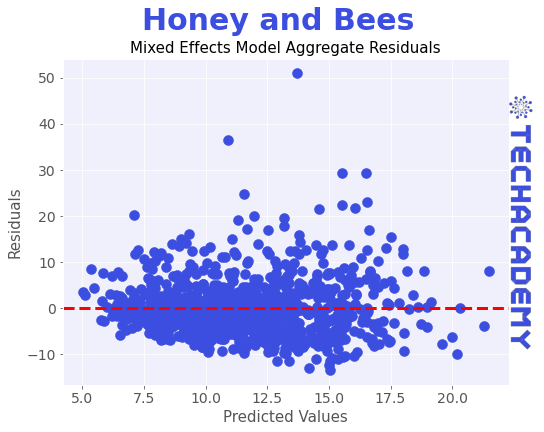

In [64]:
# Store values for checking homoskedasticity graphically
fittedvals_re_res = re_res.predict().fitted_values
residuals_re_res = re_res.resids

# 3A. Homoskedasticity
title = 'Mixed Effects Model Aggregate Residuals'
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots(figsize=(8,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
ax.scatter(fittedvals_re_res, residuals_re_res)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)

im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)
plt.show()

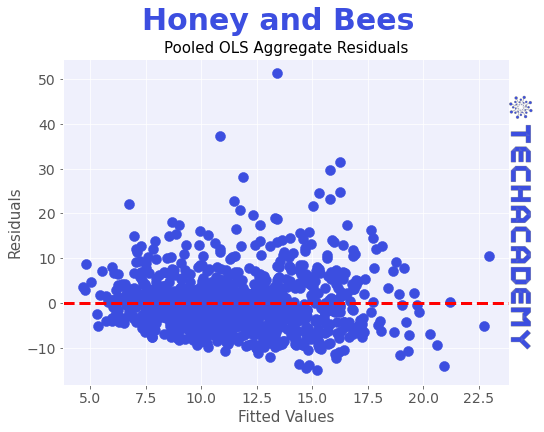

In [65]:
# Store values for checking homoskedasticity graphically
fittedvals_re_res = pooled_1_res.predict().fitted_values
residuals_re_res = pooled_1_res.resids

# 3A. Homoskedasticity
title = 'Pooled OLS Aggregate Residuals'
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots(figsize=(8,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
ax.scatter(fittedvals_re_res, residuals_re_res)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Fitted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)

im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)
plt.show()

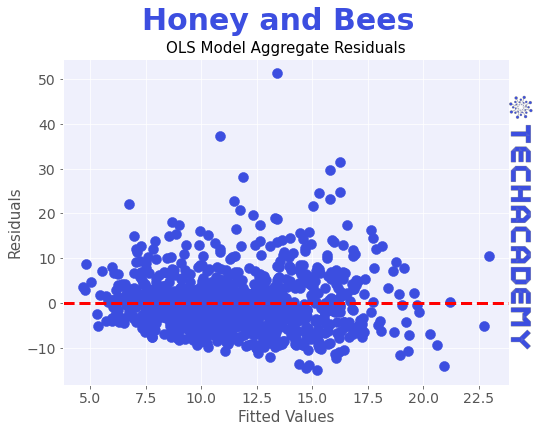

In [66]:
# Store values for checking homoskedasticity graphically
fitted_ols = naive_ols.predict()
residuals_ols = naive_ols.resid

# 3A. Homoskedasticity
title = 'OLS Model Aggregate Residuals'
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots(figsize=(8,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
ax.scatter(fitted_ols, residuals_ols)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Fitted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)

im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)
plt.show()

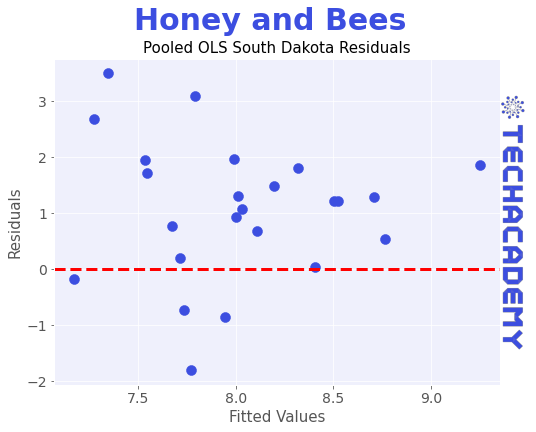

In [67]:
state = "South Dakota"
fittedvals_re_res = fe_res.predict().fitted_values.loc[[state]]
residuals_re_res = fe_res.resids.loc[[state]]

# 3A. Homoskedasticity
title = f'Pooled OLS {state} Residuals'
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots(figsize=(8,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
ax.scatter(fittedvals_re_res, residuals_re_res)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Fitted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)

im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.show()

In [68]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

mod_frame_with_res = pd.concat([mod_frame.copy(), residuals_re_res], axis=1)
durbin_watson_test_results = durbin_watson(mod_frame_with_res['residual'])
print(durbin_watson_test_results)
mod_frame_with_res["residual"]

nan


State    Date      
Alabama  2016-01-01   NaN
         2015-01-01   NaN
         2019-01-01   NaN
         2017-01-01   NaN
         2018-01-01   NaN
                       ..
Wyoming  2016-10-01   NaN
         2017-10-01   NaN
         2018-10-01   NaN
         2019-10-01   NaN
         2020-10-01   NaN
Name: residual, Length: 1008, dtype: float64